In [1]:
from sentence_transformers import SentenceTransformer

model = "sentence-transformers/all-MiniLM-L6-v2"
model = SentenceTransformer(model)
tokenizer = model.tokenizer

text = """Positional control of pneumatic manipulators for construction tasks
This paper describes solutions that can be applied to pneumatic manipulator
	problems in positioning, both for angle trajectories and for long
	linear trajectories, used in construction tasks. Optimal positioning of
	a pneumatic manipulator along angle trajectories with minimum control
	energy consumption is given. The implementation of the control system
	is presented. Control algorithms for a long linear trajectory
	manipulator based on two-phase and three-phase motion modes of the
	end-effector are investigated. Conventional and fuzzy logic controls of
	a pneumatic manipulator were applied and experimental testing was
	carried out. The obtained results allow widening the application range
	of pneumatic manipulators in construction, particularly in gantry type
	machines"""

/home/dominik/Desktop/TML/TMLenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/dominik/Desktop/TML/TMLenv/lib/python3.10/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
vocab = tokenizer.get_vocab()
vocab_to_filter = list(vocab.keys())
len(vocab_to_filter), vocab_to_filter

(30522,
 ['korea',
  'sweaty',
  'clapping',
  'ghost',
  'kowalski',
  'softball',
  '1978',
  '[unused38]',
  'temptation',
  '##ャ',
  'enterprise',
  '##ᵢ',
  '智',
  '##cer',
  'heated',
  'manipulation',
  'greg',
  'kannada',
  '##media',
  '1665',
  '[unused355]',
  '##tase',
  '##ca',
  'rematch',
  'blushed',
  'nerves',
  'mechanics',
  'formerly',
  '[unused653]',
  'fridge',
  'politely',
  'guides',
  'grammar',
  'umm',
  '##tling',
  '##oto',
  'afl',
  'forming',
  'afghan',
  'viet',
  '##rom',
  'hawthorn',
  '[unused242]',
  '##over',
  'parallels',
  'reykjavik',
  '##い',
  '[unused915]',
  '108',
  'sitting',
  'pledged',
  '##δ',
  'fall',
  'walkway',
  'belts',
  'lama',
  'norway',
  'step',
  'prevents',
  'offices',
  'portrayal',
  'absorption',
  'raises',
  '##aran',
  'breathed',
  'pitches',
  '[unused647]',
  'stalking',
  'presenter',
  'outpost',
  'specials',
  '##相',
  'distinctly',
  'ং',
  '##nti',
  '##hop',
  'intercepted',
  'follower',
  'yeoma

In [3]:
# Let's try filtering the vocav to see how many relevant tokens are there

vocab = tokenizer.get_vocab()
vocab_to_filter = list(vocab.keys())

def f(it, text_to_omit):
    return list(filter(lambda x: text_to_omit not in x, it))

substrings_to_omit = ['[unused', '#', '$', '@', '^']

for ss in substrings_to_omit:
    vocab_to_filter = f(vocab_to_filter, ss)

def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

vocab_to_filter = list(filter(isEnglish, vocab_to_filter))

print(len(vocab_to_filter))
vocab_to_filter

22750


['korea',
 'sweaty',
 'clapping',
 'ghost',
 'kowalski',
 'softball',
 '1978',
 'temptation',
 'enterprise',
 'heated',
 'manipulation',
 'greg',
 'kannada',
 '1665',
 'rematch',
 'blushed',
 'nerves',
 'mechanics',
 'formerly',
 'fridge',
 'politely',
 'guides',
 'grammar',
 'umm',
 'afl',
 'forming',
 'afghan',
 'viet',
 'hawthorn',
 'parallels',
 'reykjavik',
 '108',
 'sitting',
 'pledged',
 'fall',
 'walkway',
 'belts',
 'lama',
 'norway',
 'step',
 'prevents',
 'offices',
 'portrayal',
 'absorption',
 'raises',
 'breathed',
 'pitches',
 'stalking',
 'presenter',
 'outpost',
 'specials',
 'distinctly',
 'intercepted',
 'follower',
 'yeomanry',
 'nemesis',
 'cadillac',
 'gained',
 'duran',
 'ole',
 'clara',
 'mercantile',
 'nan',
 'shattered',
 'images',
 'rei',
 'saharan',
 'sore',
 'slovakia',
 '00pm',
 'nations',
 'beyond',
 'especially',
 'foreigners',
 'player',
 'garnered',
 'unseen',
 'settling',
 'grasp',
 'employing',
 '395',
 'token',
 'bout',
 'charming',
 'wand',
 'marat

In [4]:
# For all 'relevant' tokens lets encode them and try to visualize how the projections fill the space
filtered_vocab = vocab_to_filter
enc_relevant = model.encode(filtered_vocab)

[[ 0.01374094  0.11675849 -0.00546963 ...  0.01418281 -0.0736246
   0.04324695]
 [-0.04383435  0.00268543  0.05047818 ...  0.01525772 -0.05583498
  -0.00324862]
 [ 0.00094644 -0.01073945  0.02230043 ...  0.06617057 -0.05665462
   0.0358417 ]
 ...
 [-0.0440812   0.01384876 -0.03805974 ...  0.01612013 -0.04498034
  -0.02802769]
 [ 0.00385175  0.06402227 -0.00453901 ... -0.10438057  0.00338321
   0.03891572]
 [-0.07261265  0.03392257 -0.08323729 ... -0.00434283  0.0331273
  -0.04172479]]


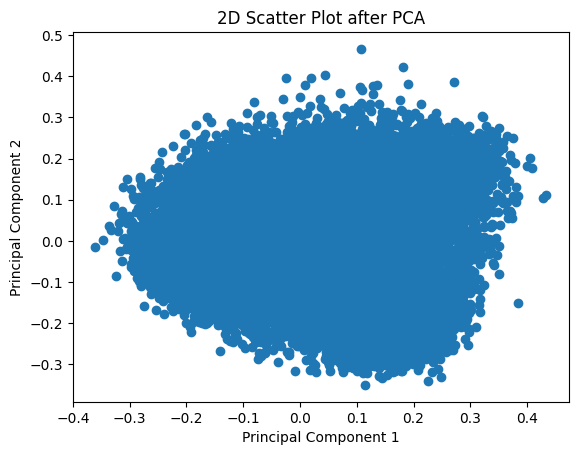

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#stolen code from gpt to do PCA


def perform_pca_and_plot(points):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(points)
    plt.scatter(principal_components[:, 0], principal_components[:, 1])
    plt.title('2D Scatter Plot after PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()
print(enc_relevant)
perform_pca_and_plot(enc_relevant)

/home/dominik/Desktop/TML/TMLenv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


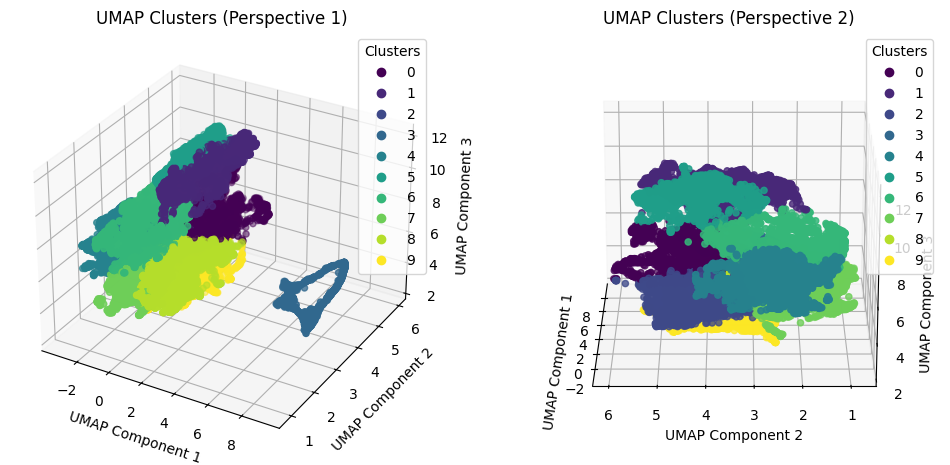

In [23]:
import numpy as np
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def perform_umap_and_kmeans_3d(data, n_clusters=10, examples_per_cluster=10):
    reducer = umap.UMAP(n_components=3)
    umap_result = reducer.fit_transform(data)

    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(umap_result)

    examples_dict = {}

    for i in range(n_clusters):
        cluster_points = np.where(cluster_labels == i)[0]
        examples = cluster_points[:examples_per_cluster]
        examples_dict[i] = examples

    # Create two 3D scatter plots with different viewing angles
    fig = plt.figure(figsize=(12, 6))

    # Plot from the first perspective
    ax1 = fig.add_subplot(121, projection='3d')
    scatter1 = ax1.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2], c=cluster_labels, cmap='viridis')
    ax1.set_title('UMAP Clusters (Perspective 1)')
    ax1.set_xlabel('UMAP Component 1')
    ax1.set_ylabel('UMAP Component 2')
    ax1.set_zlabel('UMAP Component 3')
    ax1.legend(*scatter1.legend_elements(), title='Clusters')

    # Plot from the second perspective
    ax2 = fig.add_subplot(122, projection='3d')
    scatter2 = ax2.scatter(umap_result[:, 0], umap_result[:, 1], umap_result[:, 2], c=cluster_labels, cmap='viridis')
    ax2.set_title('UMAP Clusters (Perspective 2)')
    ax2.set_xlabel('UMAP Component 1')
    ax2.set_ylabel('UMAP Component 2')
    ax2.set_zlabel('UMAP Component 3')
    ax2.view_init(elev=20, azim=180)  # Adjust the viewing angle for the second plot
    ax2.legend(*scatter2.legend_elements(), title='Clusters')

    plt.show()

    return examples_dict

# Example usage:
examples = perform_umap_and_kmeans_3d(enc_relevant)


In [24]:
from pprint import pprint

pprint(examples)
remapped_examples = {k: [filtered_vocab[x] for x in v] for k, v in examples.items()}
pprint(remapped_examples)

{0: array([ 3, 14, 41, 49, 53, 54, 55, 70, 73, 74]),
 1: array([ 0, 12, 24, 26, 27, 28, 30, 37, 38, 59]),
 2: array([ 2,  7, 10, 16, 20, 33, 40, 47, 52, 63]),
 3: array([  6,  13,  31,  80, 139, 152, 163, 172, 209, 215]),
 4: array([ 1,  9, 15, 34, 36, 43, 45, 78, 84, 86]),
 5: array([  4,   5,  11,  46,  58,  60,  98, 112, 113, 116]),
 6: array([ 19,  32,  35,  39,  56,  77, 104, 111, 122, 123]),
 7: array([ 17,  42,  44,  64,  71,  76,  88,  89, 102, 108]),
 8: array([ 8, 21, 22, 25, 29, 48, 50, 57, 61, 75]),
 9: array([ 18,  23,  51,  69,  72,  82, 118, 135, 147, 176])}
{0: ['ghost',
     'rematch',
     'offices',
     'outpost',
     'follower',
     'yeomanry',
     'nemesis',
     'nations',
     'foreigners',
     'player'],
 1: ['korea',
     'kannada',
     'afl',
     'afghan',
     'viet',
     'hawthorn',
     'reykjavik',
     'lama',
     'norway',
     'ole'],
 2: ['clapping',
     'temptation',
     'manipulation',
     'nerves',
     'politely',
     'pledged',
     '